# Домашная работа 3. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [164]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Задания разминки ( 2 балла)

1) С помощью numpy и matplotlib нарисуйте косинусоиду `np.cos`, логарифм `np.log`, произведение синусоиды на логарифм `np.sin * np.log` и прямую на одном графике (без коэффициентов). Область определения $$x \in [0,10]$$
Возьмите 1000 точек для графика.

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


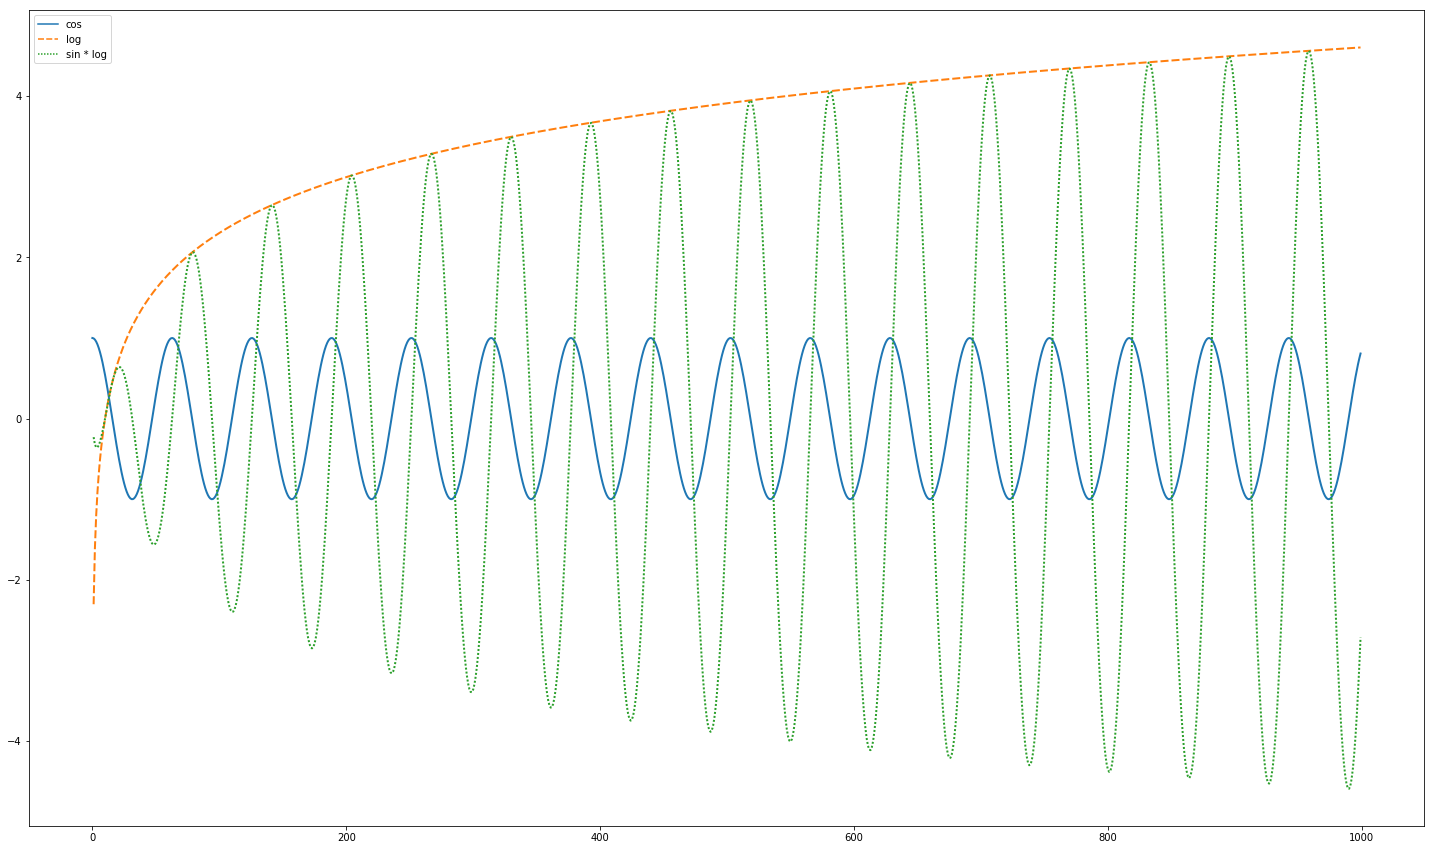

In [165]:

d = {'cos': [np.cos(x / 10) for x in range(0, 1000)], 'log': [np.log(x / 10) for x in range(0, 1000)], 'sin * log': [np.sin(x / 10) * np.log(x / 10) for x in range(0, 1000)]}
df_ = pd.DataFrame(data=d)

fig, ax = plt.subplots(nrows=1, figsize=(25,15))
sns.lineplot(data=df_, palette="tab10", linewidth=2, ax=ax)

2) Нарисуйте scatter plot для двух семейств точек:
- первое семейство точек генерируйте из стандартного нормального распределения `np.random.randn` для обеих координат x и y
- второе семейтсов точек генерируйте из стандарнтого нормального распределения для координаты x и гамма распределения формы 4 `np.random.gamma` для координты y.

Должны получиться два облака точек разного цвета, которые можно мысленно разделить прямой с некоторой погрешностью.

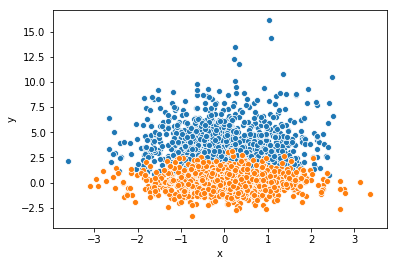

In [166]:
n = {'x': np.array([np.random.randn() for i in range(0,1000)]), 'y': np.array([np.random.randn() for i in range(0,1000)])}
g = {'x': np.array([np.random.randn() for i in range(0,1000)]), 'y': np.random.gamma(shape=4, size=1000)}

sns.scatterplot(x='x', y='y', data=pd.DataFrame(data=g))
sns.scatterplot(x='x', y='y', data=pd.DataFrame(data=n))

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Данные лежат в папке `2017-fall/data` https://github.com/7bits/ml-course-7bits/tree/master/2017-fall/data

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [167]:
df = pd.read_csv('bikes_rent.csv.gz', compression='gzip')

df.head(100)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.181250,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.686950,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.470250,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.606100,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.463500,43.6957,12.522300,5.597810,1600
5,1,0,1,0,4,1,1,8.378268,11.660450,51.8261,6.000868,2.682552,1606
6,1,0,1,0,5,1,2,8.057402,10.441950,49.8696,11.304642,5.053483,1510
7,1,0,1,0,6,0,2,6.765000,8.112700,53.5833,17.875868,7.991000,959
8,1,0,1,0,0,0,1,5.671653,5.808750,43.4167,24.250650,10.840702,822
9,1,0,1,0,1,1,1,6.184153,7.544400,48.2917,14.958889,6.687031,1321


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
season            731 non-null int64
yr                731 non-null int64
mnth              731 non-null int64
holiday           731 non-null int64
weekday           731 non-null int64
workingday        731 non-null int64
weathersit        731 non-null int64
temp              731 non-null float64
atemp             731 non-null float64
hum               731 non-null float64
windspeed(mph)    731 non-null float64
windspeed(ms)     731 non-null float64
cnt               731 non-null int64
dtypes: float64(5), int64(8)
memory usage: 74.3 KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

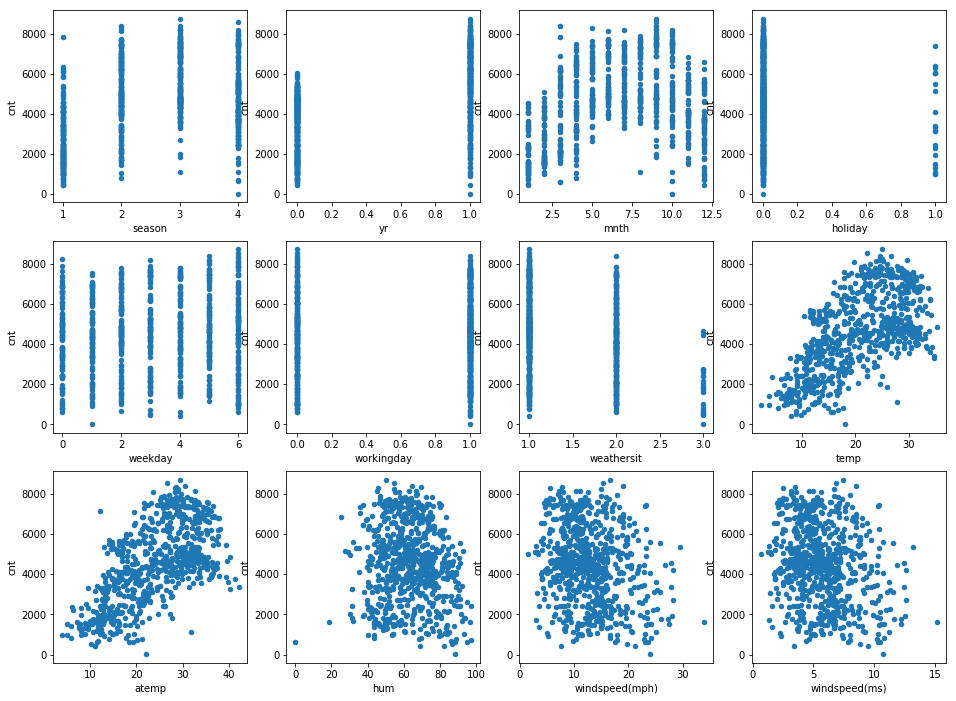

In [169]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df.columns[:-1]):
     df.plot(feature, "cnt", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

## 1. Ответьте на вопросы (каждый 1 балл):

#### Каков характер зависимости числа прокатов от месяца?

ответ:

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.

ответ:

Каков характер зависимости числа прокатов от месяца?
ответ:
    нелинейная

Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
(чем больше значение, тем больше прокатов или наоборот, например)

Можете проверить результат с помощью lnplot.

ответ: 
    yr 
    season 

D:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


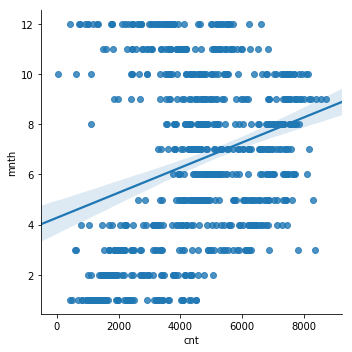

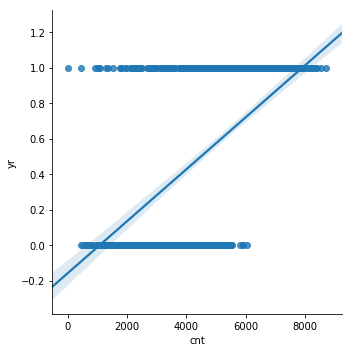

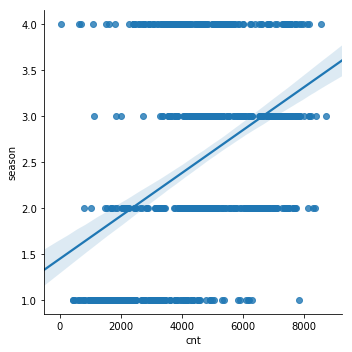

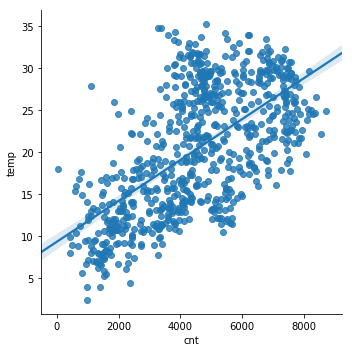

In [170]:

sns.lmplot(x='cnt', y='mnth', data=df)
sns.lmplot(x='cnt', y='yr', data=df)
sns.lmplot(x='cnt', y='season', data=df)
sns.lmplot(x='cnt', y='temp', data=df)

## 2. Корреляционная матрица (2 балла)

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ: 
    Меньше всего:
        workingday      0.061
        weekday         0.068
        holiday        -0.068
        hum            -0.1
    Больше всего:
        temp            0.63
        atemp           0.63
        yr              0.57
        season          0.41

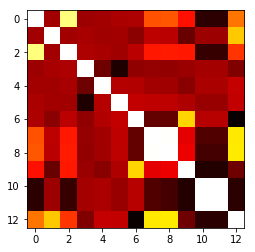

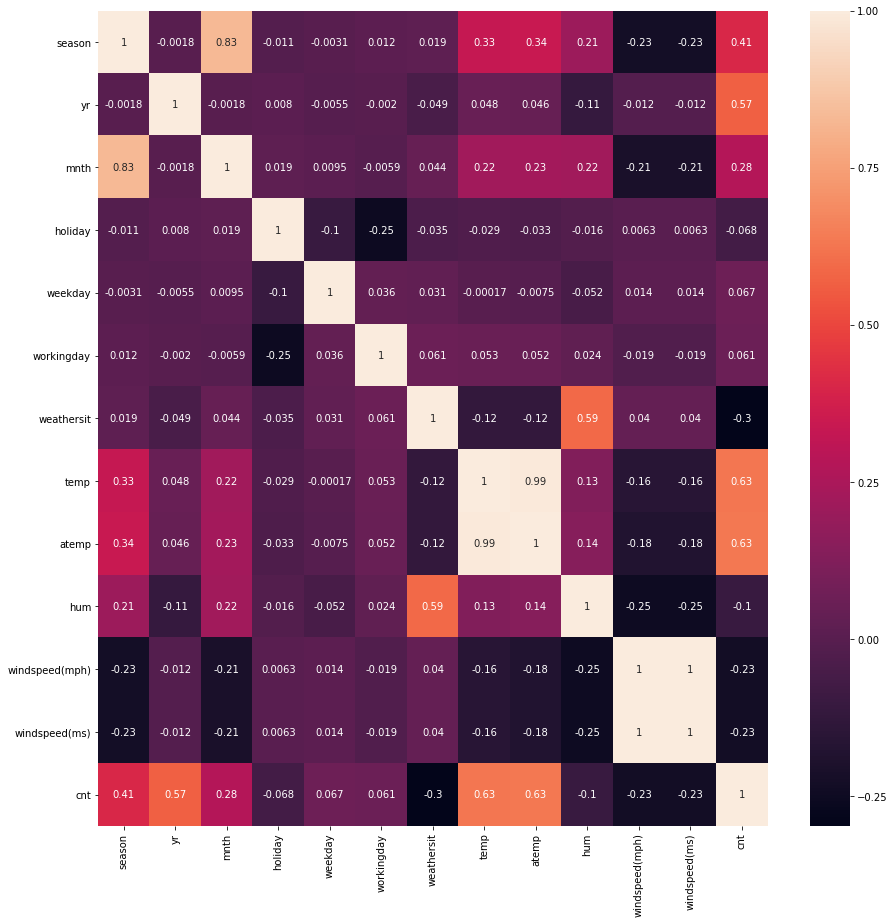

In [171]:
a = df.corr()

plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(a, annot=True, ax=ax)

## 3. Barpot (2 балла)

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: 
    Так как в след году больше кол-во прокатов

D:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


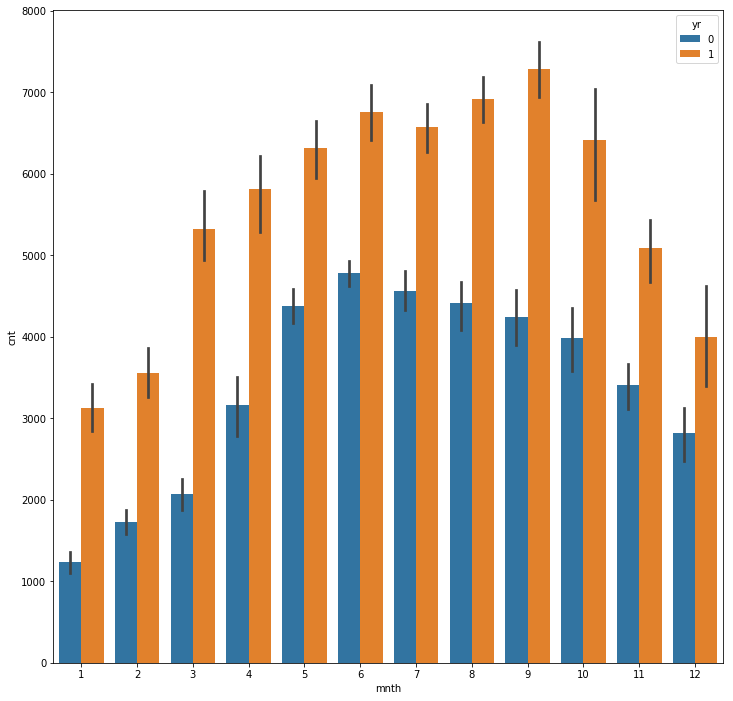

In [172]:
fig, ax = plt.subplots(figsize=(12,12))
sns.barplot(x="mnth", y="cnt", hue="yr", data=df, ax=ax)

## 4. Countplot (3 балла)

Постройте countplot диаграммы для признаков `weekday`, `weathersit`, 

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?

Ответ: 
    Ничего. 
Ответ: 
    Равномерное распределение

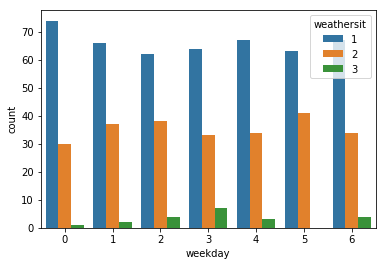

In [173]:
sns.countplot(data=df, x='weekday', hue='weathersit')

D:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


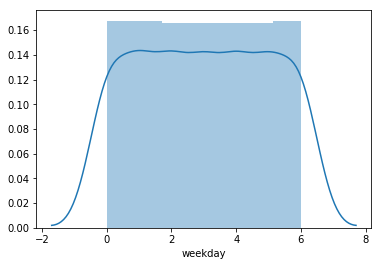

In [174]:
sns.distplot(df['weekday'])

## 5. Распределение (3 балла)

Постройте распределение целевого признака.

**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

**Ответьте на вопрос:** Как называется полученное распределение?.

Ответ: 
    ~4500
Ответ:
    Нормальное распределение

D:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


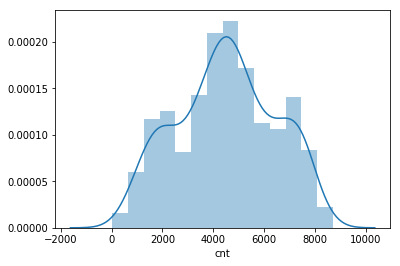

In [175]:
sns.distplot(df['cnt'])

## 6. Совместное распределение признаков (2 балла)

Постройте график совместного распределения признаков температура и ощущение температуры.

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: 
    Ну там внизу один выброс настораживает.
    Ощущение температуры примерно на 5 больше настоящей температуры.

D:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


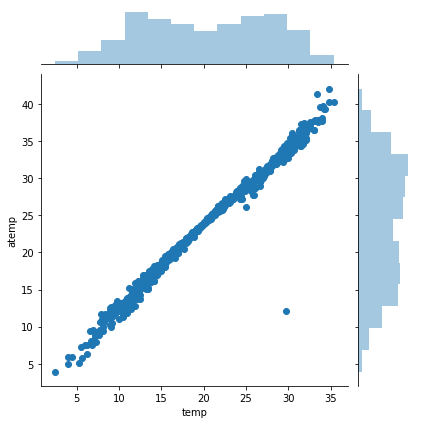

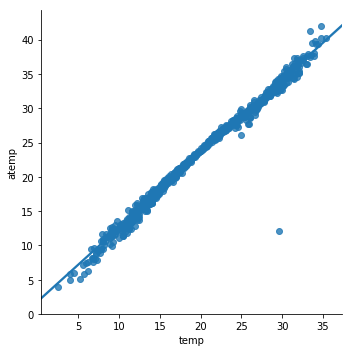

In [176]:
sns.jointplot(x='temp', y='atemp', data=df)

sns.lmplot(x='temp', y='atemp', data=df)

## 7. Ящик с усами (2 балла)

Нарисуйте сами для распределения количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.


Ответ:
    Наиболее благоприятная температура(погоды?) для езды. Не холодно как в 1,2,3,4,10,11,12.Не жарко как в 7,8. 
    Еще может отпуска если за они не считаются выходными.
    И еще ветер после 4 месяца спокойней.

D:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


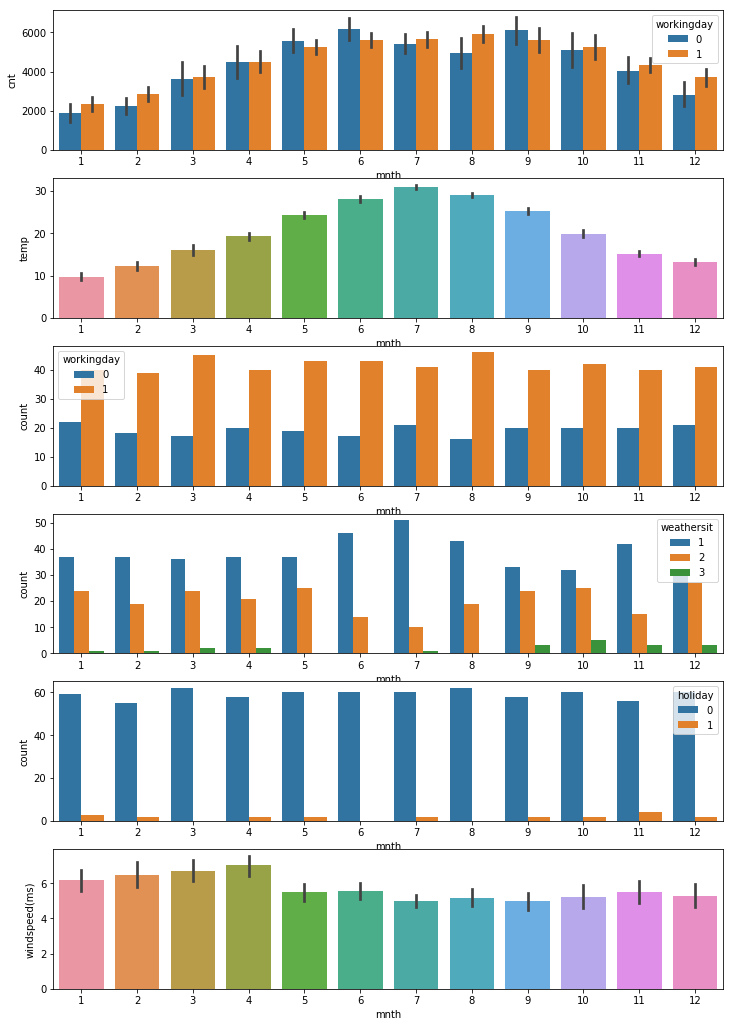

In [182]:
#0 - нерабочий день
fig, ax = plt.subplots(nrows=6, figsize=(12,18))
sns.barplot(x="mnth", y="cnt", hue="workingday", data=df, ax=ax[0])
#Это просто посмотреть
sns.barplot(x="mnth", y="temp", data=df, ax=ax[1])
sns.countplot(data=df, x='mnth', hue='workingday', ax=ax[2])
sns.countplot(data=df, x='mnth', hue='weathersit', ax=ax[3])
sns.countplot(data=df, x='mnth', hue='holiday', ax=ax[4])
sns.barplot(data=df, x='mnth', y='windspeed(ms)', ax=ax[5])


## 8. Хитрый вопрос (3 балла)

Правда ли, что при более сильном ветре человеку ощущается, что на улице холодне, чем на самом деле? Нарисуйте график, подтверждающий или опровергающий эту гипотезу. Обоснуйте. Возможно, вам придется создать новый признак.

Рассуждение:

In [193]:

for i in df.index:
    if df['atemp'][i] < df['temp'][i]:
        print("Холоднее")
        print(df['atemp'][i])
        print(df['temp'][i])
        
#Есть всего 2 дня когда ощущалось холоднее ,чем на самом деле.
#При этом atemp=12.12 temp=29.65 это вообще какие-то аномальные данные.
#В этом хитрость вопроса или у меня не та таблица?
#Попробую потдвердить
df['dtemp'] = df['atemp'] - df['temp']

sns.lmplot(x='windspeed(ms)', y='dtemp', data=df)

'''
Да правда. По графику видно ,что с усилением ветра люди больше ощибаются в ощущениях.
'''

Холоднее
5.0829
5.2275
Холоднее
12.12
29.656653000000002


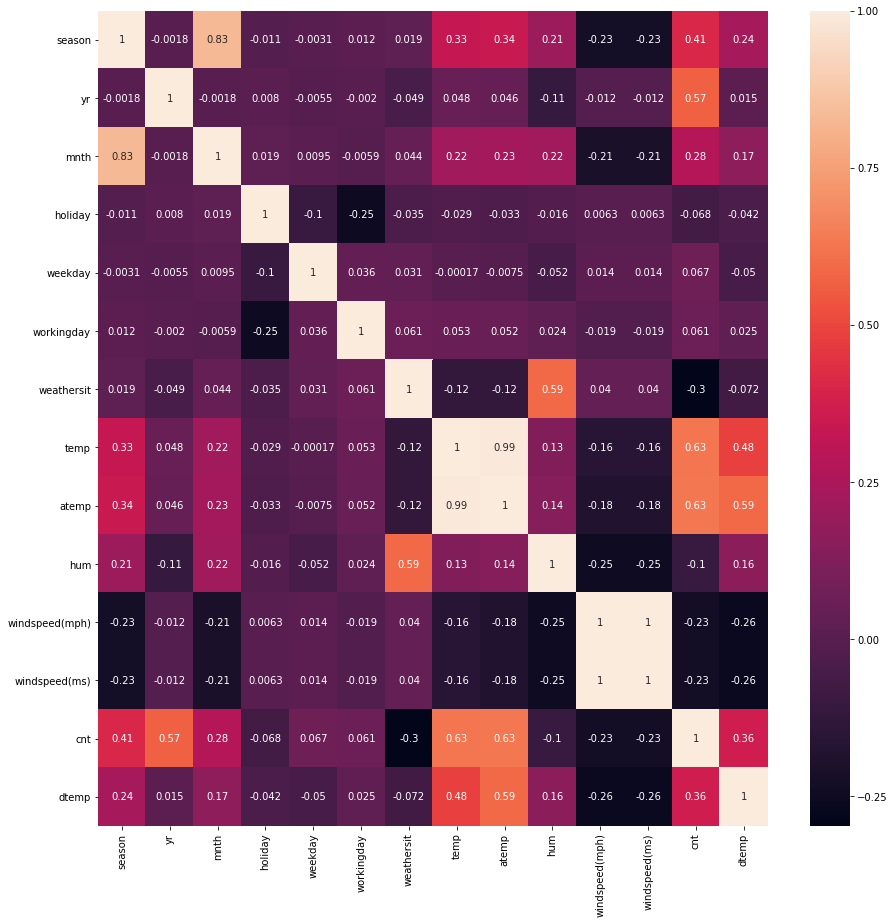

In [188]:

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(df.corr(), annot=True, ax=ax)

D:\Program Files\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


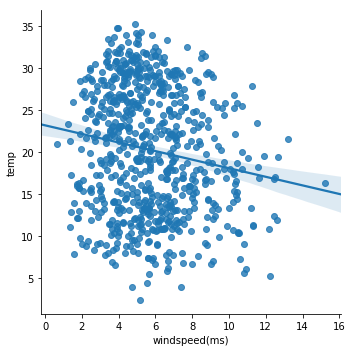

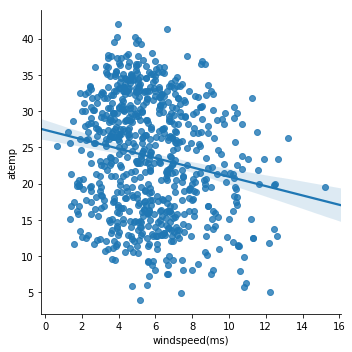

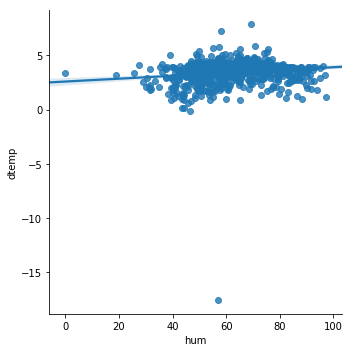

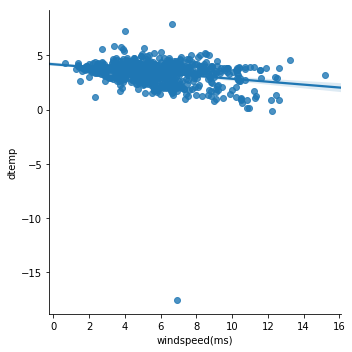

In [195]:


sns.lmplot(x='windspeed(ms)', y='temp', data=df)
sns.lmplot(x='windspeed(ms)', y='atemp', data=df)
sns.lmplot(x='hum', y='dtemp', data=df)
sns.lmplot(x='windspeed(ms)', y='dtemp', data=df)
